![header](https://i.imgur.com/I4ake6d.jpg)

# COPERNICUS MARINE SERVICE ICELAND TRAINING

<div style="text-align: right"><i> INTERMEDIATE LEVEL </i></div>

***
<center><h1> Monitoring Marine Heat Waves around Iceland </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. Set up Python](#2.-Set-up-Python)
    - [2.1 Required Python modules](#2.1-Required-Python-modules)
    - [2.2. Presentation of the product used](#2.3.-Presentation-of-the-product-used)
- [3. Manipulating and preprocessing the CMEMS SST observation files](#3.-Manipulating-and-preprocessing-the-CMEMS-SST-observation-files)
    - [3.1. Open one SST observation products](#3.1.-Open-one-SST-observation-products)
    - [3.2. Open multiple SST observation products and concatenate them altogether](#3.2.-Open-multiple-SST-observation-products-and-concatenate-them-altogether)
- [4. Detect and characterize MHWs](#4.-Detect-and-characterize-MHWs)
    - [4.1. SST spatial averaging and time vector formatting](#4.1.-SST-spatial-averaging-and-time-vector-formatting)
    - [4.2. Marine Heat Waves detection](#4.2.-Marine-Heat-Waves-detection)
    - [4.3. 2D maps of marine heat waves statistics over a year](#4.4.-2D-maps-of-marine-heat-waves-statistics-over-a-year)
- [5. Conclusion](#5.-Conclusion)
- [6. Exercises](#6.-Exercises)

# 1. Introduction
[Go back to the "Table of contents"](#Table-of-contents)


Welcome to this Copernicus Marine Service training ! 

This is the second book of the training workshop dedicated to the waters around Iceland, and has been designed for intermediate users. The first book, dedicated to beginners, explains the basics of Python for manipulating and visualizing Copernicus Marine Service products. In this workbook, we'll be using a set of products to study the marine heat waves occurring around Iceland.

Heat waves are prolonged period of abnormally warm weather. Such events have gained in intensity and frequency in the last decades in almost all regions to the point where it has now become a major threat to human health, activities, properties and the ecosystems. Most people are familiar with atmospheric heat waves but fewer know that oceans and seas also experience a similar phenomenon called Marine Heat Wave (MHW). The first and now widely used scientific definition of MHW was established by <a href="https://www.sciencedirect.com/science/article/abs/pii/S0079661116000057?via%3Dihub"> Hobday et al., 2016 </a>.They are defined as a period of at least five days of unusually high Sea Surface Temperatures (SST) above the 90th percentile threshold of an SST climatology. The mechanisms behind these events are not fully understood yet and their study is relatively recent. 


In this notebook, we are going to learn how to detect and characterize MHWs around Iceland.

# 2. Set up Python
[Go back to the "Table of contents"](#Table-of-contents)

## 2.1 Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Here is the list of the modules we will be using in this exercise.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays. |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) is a very user friendly library to manipulate NetCDF files within Python. It introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces high quality figures. |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |
| **datetime** |[Datetime](https://docs.python.org/3/library/datetime.html) supplies classes for manipulating dates and times |
| **marineHeatWaves** |[marineHeatWaves](https://github.com/ecjoliver/marineHeatWaves) is a module for python which implements the MHW definition of <a href="https://www.sciencedirect.com/science/article/abs/pii/S0079661116000057?via%3Dihub"> Hobday et al., 2016 </a> (source code available in the [marineHeatWaves.py](marineHeatWaves.py) script)|

In [1]:
# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import datetime
import pandas as pd

# Load marineHeatWaves definition module
import marineHeatWaves as mhw

## 2.2. Presentation of the product used
[Go back to the "Table of contents"](#Table-of-contents)

In this notebook, we are going  to focus on the Copernicus Marine Service product **Global Ocean OSTIA Sea Surface Temperature and Sea Ice Reprocessed** dataset. In this observation based product, the daily SST values are distributed on a regular grid of 0.05° x 0.05°. We have downloaded the SST maps around Iceland from 2001 to 2021. The data are split into 4 files of 5 years each. Reprocessed products provide more precise SST estimations from satellite measurements. The acquisitions coming from various missions have been consistenly reprocessed with fine tuned algorithms adapted to the observation systems as we better understand them over time.  Here is a brief overview of the product's characteristics:


| Parameter | Value |
| :---: | :---|
| **Variables used** | analysed_sst *(analysed sea surface temperature)* |
| **Product identifier** |[SST_GLO_SST_L4_REP_OBSERVATIONS_010_011](https://data.marine.copernicus.eu/product/SST_GLO_SST_L4_REP_OBSERVATIONS_010_011/description) |
| **Spatial resolution** | 0.05° x 0.05° |
| **Temporal resolution** | daily mean |
| **Temporal coverage** | from 1981-10-01 to 2022-05-31 |
| **Vertical coverage** |surface only (1 level) |

<center>
    <img src="img/spatial_coverage.png" width="600">
</center>

**Description** : The OSTIA (Good et al., 2020) global sea surface temperature reprocessed product provides daily gap-free maps of foundation sea surface temperature and ice concentration (referred to as an L4 product) at 0.05deg.x 0.05deg. horizontal grid resolution, using in-situ and satellite data. This product provides the foundation Sea Surface Temperature, which is the temperature free of diurnal variability. [See DOI (product)](https://doi.org/10.48670/moi-00168)

**For detailed information about the product, please consult the document:** [Product User Manual (PUM)](https://catalogue.marine.copernicus.eu/documents/PUM/CMEMS-SST-PUM-010-011.pdf)

**For information about the quality of the product, please consult the document:** [Quality Information Document (QUID)](https://catalogue.marine.copernicus.eu/documents/QUID/CMEMS-SST-QUID-010-011.pdf)

# 3. Manipulating and preprocessing the CMEMS SST observation files
[Go back to the "Table of contents"](#Table-of-contents)

To detect and characterize the MHWs around Iceland, we will use a specific python module which implements the Hobday et. al definition of a MHW. As a recall, MHW is defined as *a prolonged discrete anomalously warm water event that can be described by its duration, intensity, rate of evolution, and spatial extent. Specifically, we consider an anomalously warm event to be a MHW if it lasts for five or more days, with temperatures warmer than the 90th percentile based on a 30-year historical baseline period.* In this regards, the Copernicus Marine Service SST products  are partiularly suited to detect and characterize these events as the reprocessed collection provide a long and consistent time series.
Before processing the product, let's open them, check their structure and pre-process them for our study.

## 3.1. Open one SST observation products
[Go back to the "Table of contents"](#Table-of-contents)

The SST products are stored in the <code>data/</code> folder. Due to the limit of 1Gb per download, the 20 year SST time series is split into 4 files of 5 years:
* 2001-2005
* 2006-2010
* 2011-2015
* 2016-2020

The files are names accordingly. For example the 2016-2020 time series has been renamed <code>METOFFICE-GLO-SST-L4-REP-OBS-SST_2016_2020.nc</code>

In [2]:
# Open one 5 year time series using xr.open_dataset
ds=xr.open_dataset('data/METOFFICE-GLO-SST-L4-REP-OBS-SST_2016_2020.nc')

# Check on the product's variables
ds

<xarray.Dataset>
Dimensions:       (time: 1827, latitude: 130, longitude: 270)
Coordinates:
  * latitude      (latitude) float32 61.52 61.58 61.62 ... 67.88 67.92 67.97
  * longitude     (longitude) float32 -25.48 -25.43 -25.38 ... -12.08 -12.03
  * time          (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2020-12-31
Data variables:
    analysed_sst  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    title:             Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg dail...
    institution:       UKMO
    source:            AMSR2-REMSS-L2P-v2.0, AMSRE-REMSS-L2P-v2.0, GOES<13,16...
    history:           Created from sst.nc; obs_anal.nc; seaice.nc
    references:        Donlon, C.J., Martin, M., Stark, J.D., Roberts-Jones, ...
    comment:           WARNING Some applications are unable to properly handl...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  SST_GLO_SST_L4_REP_OBSERVATIONS_010_011
    subset:datasetId:  METOFFICE-GLO-SST-L4-REP-OBS-SST_202003
    subset:date:       2024-09-18T08:48:50.415Z

As you can see, the dataset contains a single variable <code>analysed_sst</code> in Kelvin which depends on three dimensions:
* time (a value per day)
* longitude
* latitude

As it may be more practical to work with °C, let's convert the <code>analysed_sst</code> from Kelvin to celsius and add a new variable to our dataset <code>ds</code>:

In [3]:
# Convert from Kelvin to Celsius by substracting 273.15 and store the result in a new variable
ds=ds.assign(analysed_sst_C=ds['analysed_sst']-273.15)
# Add attributes to the new variable
ds['analysed_sst_C']=ds['analysed_sst_C'].assign_attrs({'long_name':'analysed sea surface temperature',
                                                        'units':'celsius',
                                                        'comment':'analysed_sst_C=analysed_SST-273.15'})

# Check on the product's variables
ds

<xarray.Dataset>
Dimensions:         (time: 1827, latitude: 130, longitude: 270)
Coordinates:
  * latitude        (latitude) float32 61.52 61.58 61.62 ... 67.88 67.92 67.97
  * longitude       (longitude) float32 -25.48 -25.43 -25.38 ... -12.08 -12.03
  * time            (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2020-12-31
Data variables:
    analysed_sst    (time, latitude, longitude) float32 280.7 280.7 ... 274.4
    analysed_sst_C  (time, latitude, longitude) float32 7.57 7.56 ... 1.19 1.2
Attributes:
    Conventions:       CF-1.11
    title:             Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg dail...
    institution:       UKMO
    source:            AMSR2-REMSS-L2P-v2.0, AMSRE-REMSS-L2P-v2.0, GOES<13,16...
    history:           Created from sst.nc; obs_anal.nc; seaice.nc
    references:        Donlon, C.J., Martin, M., Stark, J.D., Roberts-Jones, ...
    comment:           WARNING Some applications are unable to properly handl...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  SST_GLO_SST_L4_REP_OBSERVATIONS_010_011
    subset:datasetId:  METOFFICE-GLO-SST-L4-REP-OBS-SST_202003
    subset:date:       2024-09-18T08:48:50.415Z

In order to better visualize the geographical hold of the product, let's plot one time frame ! 

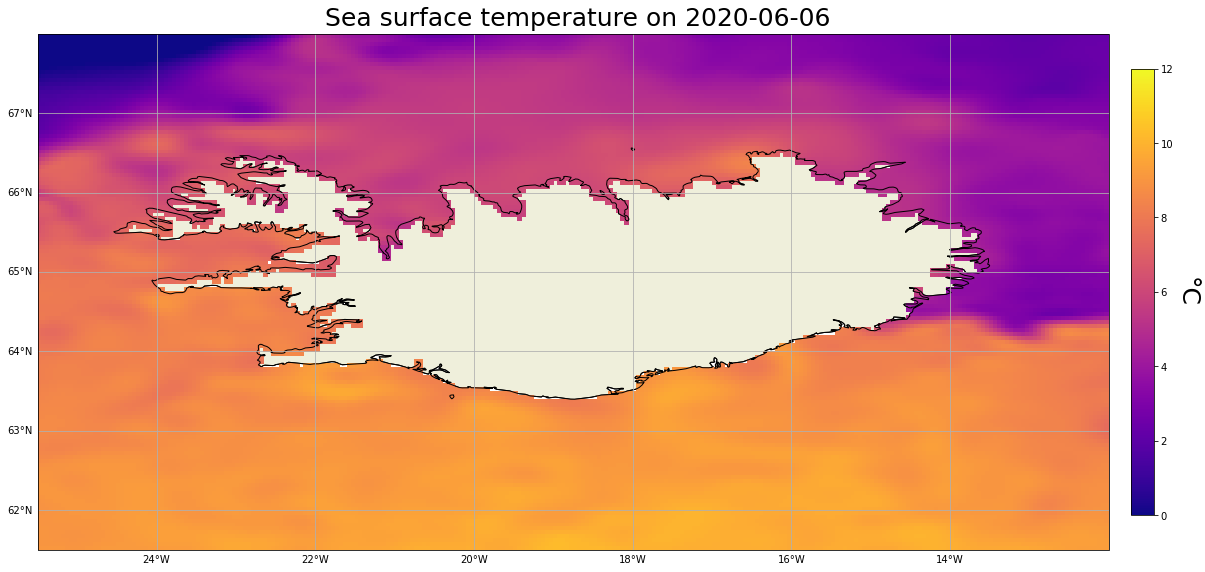

In [4]:
# Select the temperature parameter, at the date and store it in a variable.
# Define a date that is available in the product
date_plot='2020-06-06'
temp_map = ds['analysed_sst_C'].sel(time=date_plot).squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(20, 16))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-12, -25.5, 61.5, 68],crs=ccrs.PlateCarree())                       # define the extent of the map [lon_min,lon_max,lat_min,lat_max]


# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(temp_map['longitude'].data, temp_map['latitude'].data,temp_map,vmin=0,vmax=12,cmap='plasma')
    

# Add the titles and legend
f.suptitle('Sea surface temperature on {}'.format(date_plot),fontsize=25, y=0.75)              # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('°C', rotation=270,fontsize=25, labelpad=25)                                    # add the title of the colorbar

# Save figure
plt.savefig('out/temp_map.png')

For studying MHWs, we are interested in time series longer than 5 years. Hobday et al., recommends to consider à time series of at least 30 year. In order to simplify this case study and shorten the computing time, we will consider a 20 year long time series from 2001 to 2020. As explained above this 20 year long SST time series is split into 4 files. We hence need to open these 4 files simultanously and concatenate them along the time dimension. This is the purpose of the next part.

## 3.2. Open multiple SST observation products and concatenate them altogether
[Go back to the "Table of contents"](#Table-of-contents)

First, we collect all NetCDF <code>.nc</code> file names in our <code>data/</code> directory.

In [5]:
# Define the data directory
data_dir='data/'

# Collect all netcdf file names in the data directory
filenames=glob.glob(data_dir+'*.nc')

#Check the variable
filenames

['data/METOFFICE-GLO-SST-L4-REP-OBS-SST_2006_2010.nc',
 'data/METOFFICE-GLO-SST-L4-REP-OBS-SST_2001_2005.nc',
 'data/METOFFICE-GLO-SST-L4-REP-OBS-SST_2016_2020.nc',
 'data/METOFFICE-GLO-SST-L4-REP-OBS-SST_2011_2015.nc']

Now, let's use the open_mfdataset function of xarray to simultaneously open the four files. Before opening each file, we will apply a simple preprocessing function which will consist in converting the <code>analysed_sst</code> DataArray from Kelvin to Celsius.

In [6]:
def preprocess(ds):
    '''Convert the analysed_sst variable from K to C'''
    ds['analysed_sst']=ds['analysed_sst']-273.15
    ds['analysed_sst']=ds['analysed_sst'].assign_attrs({'units':'Celsius',})
    return ds

In [7]:
# Concatenate the 4 5 year SST time series into a single 20 year SST time series and convert from K to C
ds_all=xr.open_mfdataset(filenames,preprocess=preprocess)

# Check on the ouput
ds_all

<xarray.Dataset>
Dimensions:       (time: 7305, latitude: 130, longitude: 270)
Coordinates:
  * latitude      (latitude) float32 61.52 61.58 61.62 ... 67.88 67.92 67.97
  * longitude     (longitude) float32 -25.48 -25.43 -25.38 ... -12.08 -12.03
  * time          (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2020-12-31
Data variables:
    analysed_sst  (time, latitude, longitude) float32 dask.array<chunksize=(1826, 130, 270), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.11
    title:             Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg dail...
    institution:       UKMO
    source:            AMSR2-REMSS-L2P-v2.0, AMSRE-REMSS-L2P-v2.0, GOES<13,16...
    history:           Created from sst.nc; obs_anal.nc; seaice.nc
    references:        Donlon, C.J., Martin, M., Stark, J.D., Roberts-Jones, ...
    comment:           WARNING Some applications are unable to properly handl...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  SST_GLO_SST_L4_REP_OBSERVATIONS_010_011
    subset:datasetId:  METOFFICE-GLO-SST-L4-REP-OBS-SST_202003
    subset:date:       2024-09-18T08:45:57.911Z

As you can see, the <code>analysed_sst</code> variable is split into chunks which is not the <code>DataArray</code> structure we are used to. In order to work more conveniently with the file and to speed up the processing, we are going to export our intermediate output, the concatenated 20 year time series as a NetCDF file. Be patient as this operation may take a few minutes.

In [8]:
export_path=data_dir+'time_series/METOFFICE-GLO-SST-L4-REP-OBS-SST_2001_2020.nc'

In [9]:
#Export the concatenated dataset in a netCDF file
ds_all.to_netcdf(path=export_path)

#close the Dataset
ds_all.close()

And we open the new 20 year SST time series around Iceland as a new xarray Dataset

In [10]:
#Open the 20 year SST time series
ds_20y=xr.open_dataset(export_path)

# Check on the product's variables
ds_20y

<xarray.Dataset>
Dimensions:       (time: 7305, latitude: 130, longitude: 270)
Coordinates:
  * latitude      (latitude) float32 61.52 61.58 61.62 ... 67.88 67.92 67.97
  * longitude     (longitude) float32 -25.48 -25.43 -25.38 ... -12.08 -12.03
  * time          (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2020-12-31
Data variables:
    analysed_sst  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    title:             Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg dail...
    institution:       UKMO
    source:            AMSR2-REMSS-L2P-v2.0, AMSRE-REMSS-L2P-v2.0, GOES<13,16...
    history:           Created from sst.nc; obs_anal.nc; seaice.nc
    references:        Donlon, C.J., Martin, M., Stark, J.D., Roberts-Jones, ...
    comment:           WARNING Some applications are unable to properly handl...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  SST_GLO_SST_L4_REP_OBSERVATIONS_010_011
    subset:datasetId:  METOFFICE-GLO-SST-L4-REP-OBS-SST_202003
    subset:date:       2024-09-18T08:45:57.911Z

We now have 20 years of daily SST values around Iceland concatenated into a single NetCDF file and a single xr.DataSet ! Let's now work on detecting MHW events.

# 4. Detect and characterize MHWs
[Go back to the "Table of contents"](#Table-of-contents)

To detect and characterize the MHWs, we will work with the <code>marineHeatWaves.py</code> python module which consists in several functions. The main one is the <code>mhw.detect()</code> function and it *applies the Hobday et al. (2016) marine heat wave definition to an input time series of temp ('temp') along with a time vector ('t'). It outputs properties of all detected marine heat waves*. These properties include the start and end date of the event, the maximum and mean intensity of the event etc. More information about the inputs, outputs and processes are available within the python module source code and in the [module github](https://github.com/ecjoliver/marineHeatWaves).

As the <code>mhw.detect()</code> function takes as input two 1D arrays (t and temp), we will need to perform some additional pre-processing on our 20 year SST time series. Indeed, for now, we do have a 1D array of date (<code>time</code> dimension of the product) but a 3D array of SST (<code>analysed_sst</code> which depends on <code>(time,lon,lat)</code>. As a consequence, we are going to average the SST values around Iceland and we will hence identify the time periods where Icelandic waters as a whole experienced a MHW event.

## 4.1. SST spatial averaging and time vector formatting
[Go back to the "Table of contents"](#Table-of-contents)

Let's first spatially average our SST time series. As it spans over 20 years, the processing may take a few minutes.

In [11]:
# Spatially average the SST
ds_20y_avg=ds_20y['analysed_sst'].mean(dim=["longitude","latitude"],skipna=True)

# Display the result
ds_20y_avg

<xarray.DataArray 'analysed_sst' (time: 7305)>
array([5.340156 , 5.2969995, 5.2264915, ..., 5.379797 , 5.3778043,
       5.347056 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2020-12-31

Let's now gather the dates and temperature in 1D arrays

In [12]:
# Collect the mean SST in a np Array
temp=ds_20y_avg.data

# Collect the time values in a 1D array and convert the precision from ns to D
date=ds_20y_avg['time'].data.astype('datetime64[D]')

#Check on the date array
date

array(['2001-01-01', '2001-01-02', '2001-01-03', ..., '2020-12-29',
       '2020-12-30', '2020-12-31'], dtype='datetime64[D]')

As you can see, the date array is of type np.datetime64. The <code>mhw.detect()</code> function expects datetime.date() object. Let's convert the date array from np.datetime64 to datetime.date(): 

In [13]:
# Convert from np.datetime64 to datetime.date()
date_datetime=date.tolist()

# Finally convert to ordinal (number of days since January 1st of year 1) and store in a np array as required by the mhw.detect() function
date_datetime_ordinal = np.asarray([datetime.date.toordinal(tt) for tt in date_datetime])

#Display the first 10 elements of the converted array
date_datetime_ordinal[0:10]

array([730486, 730487, 730488, 730489, 730490, 730491, 730492, 730493,
       730494, 730495])

Now our inputs are well formatted to be used in the <code>mhw.detect()<code> function.

## 4.2. Marine Heat Waves detection
[Go back to the "Table of contents"](#Table-of-contents)

Let's now use the <code>mhw.detect()</code> function on our time and temperature 1D array.

In [14]:
# mhw.detect() outputs the list of MHW event over our time period along with their characteristics
# It also outputs a climatology relative to which the MHW is defined
mhws, clim = mhw.detect(date_datetime_ordinal, temp)

In [15]:
# Show the content of the first output
mhws.keys()

dict_keys(['time_start', 'time_end', 'time_peak', 'date_start', 'date_end', 'date_peak', 'index_start', 'index_end', 'index_peak', 'duration', 'duration_moderate', 'duration_strong', 'duration_severe', 'duration_extreme', 'intensity_max', 'intensity_mean', 'intensity_var', 'intensity_cumulative', 'intensity_max_relThresh', 'intensity_mean_relThresh', 'intensity_var_relThresh', 'intensity_cumulative_relThresh', 'intensity_max_abs', 'intensity_mean_abs', 'intensity_var_abs', 'intensity_cumulative_abs', 'category', 'rate_onset', 'rate_decline', 'n_events'])

In [16]:
# Show the content of the second output
clim.keys()

dict_keys(['thresh', 'seas', 'missing'])

As you can see, these output variables contain many information describing the MHWs identified. You can find their extensive description on the [module github documentation](https://github.com/ecjoliver/marineHeatWaves). Let's check the number of MHW events detected during our time period.

In [17]:
# n_events keys gives the number of MHW during our Time period
print('There has been {} detected MHW events around Iceland between {} and {}'.format(mhws['n_events'],date[0],date[-1]))

There has been 33 detected MHW events around Iceland between 2001-01-01 and 2020-12-31


Let's now find out which event was the most important one. You can also find such an example in the jupyter notebook in the marineHeatWave python module github.

In [18]:
# Find largest event
ev = np.argmax(mhws['intensity_max']) 

#Print the characteristics of the event.
print('Maximum intensity:', mhws['intensity_max'][ev], 'deg. C above the threshold')
print('Average intensity:', mhws['intensity_mean'][ev], 'deg. C above the threshold')
print('Duration:', mhws['duration'][ev], 'days')
print('Start date:', mhws['date_start'][ev].strftime("%d %B %Y"))
print('End date:', mhws['date_end'][ev].strftime("%d %B %Y"))

Maximum intensity: 1.7881364514750828 deg. C above the threshold
Average intensity: 1.3947238407860485 deg. C above the threshold
Duration: 67 days
Start date: 15 July 2003
End date: 19 September 2003


The biggest event spotted by the mhw python module is the MHW of 2003.

Let's now focus our analysis on this particular MHW event. On a single figure, we plot the 20 year long SST time series along with the climatology and the seasonal threshold and we zoom on the worst MHW event identified earlier.

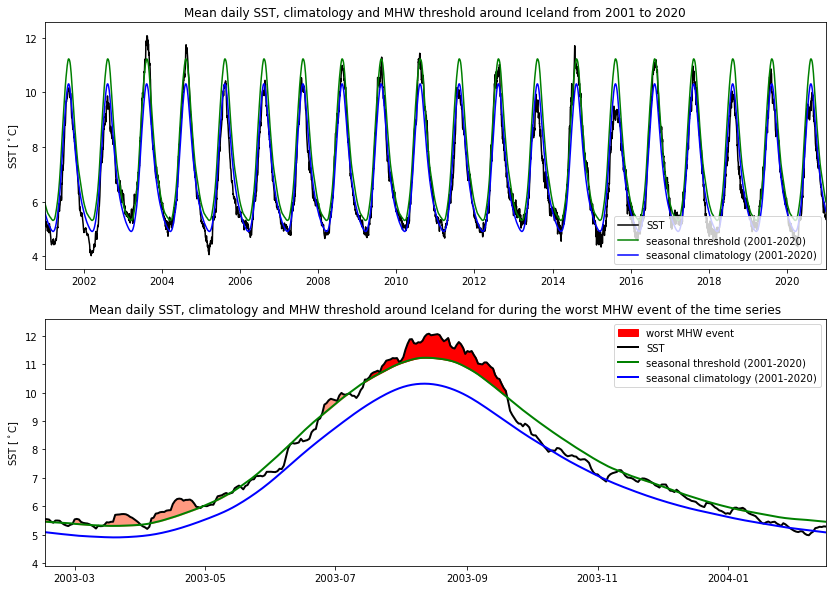

In [19]:
# Create the figure
fig,(axe1,axe2)=plt.subplots(2,1,figsize=(14,10))

## First subplot
# Plot SST, seasonal cycle, and threshold
#SST
axe1.plot(date, temp, 'k-',label='SST')
#Climatology threshold (90th percentile)
axe1.plot(date, clim['thresh'], 'g-',label='seasonal threshold (2001-2020)')
#Seasonal climatology
axe1.plot(date, clim['seas'], 'b-',label='seasonal climatology (2001-2020)')

# Properties of top ax
axe1.set_title('Mean daily SST, climatology and MHW threshold around Iceland from 2001 to 2020')
axe1.legend(loc='lower right')
axe1.set_xlim(date[0], date[-1])
axe1.set_ylim(temp.min()-0.5, temp.max()+0.5)
axe1.set_ylabel(r'SST [$^\circ$C]')


## Second subplot
# Find indices for all ten MHWs before and after event of interest and shade accordingly
for ev0 in np.arange(ev-10, ev+11, 1):
    try:
        t1 = np.where(date_datetime_ordinal==mhws['time_start'][ev0])[0][0]
        t2 = np.where(date_datetime_ordinal==mhws['time_end'][ev0])[0][0]
        axe2.fill_between(date[t1:t2+1], temp[t1:t2+1], clim['thresh'][t1:t2+1], \
                         color=(1,0.6,0.5))
    except IndexError:
        # if indice lower than worst event,keep going
        if ev0<ev:
            ev0+=1
        else:
        # stop the for loop
            break
# Find indices for MHW of interest and shade accordingly
t1 = np.where(date_datetime_ordinal==mhws['time_start'][ev])[0][0]
t2 = np.where(date_datetime_ordinal==mhws['time_end'][ev])[0][0]
axe2.fill_between(date[t1:t2+1], temp[t1:t2+1], clim['thresh'][t1:t2+1], \
                 color='r',label='worst MHW event')
# Plot SST, seasonal cycle, threshold, shade MHWs with main event in red
axe2.plot(date, temp, 'k-', linewidth=2, label='SST')
axe2.plot(date, clim['thresh'], 'g-', linewidth=2, label='seasonal threshold (2001-2020)')
axe2.plot(date, clim['seas'], 'b-', linewidth=2, label='seasonal climatology (2001-2020)')

#Properties of bottom ax
axe2.set_title('Mean daily SST, climatology and MHW threshold around Iceland for during the worst MHW event of the time series')
axe2.legend()
axe2.set_xlim(date[t1]-np.timedelta64(150,'D'), date[t2]+ np.timedelta64(150,'D'))
axe2.set_ylim(clim['seas'].min() - 1, clim['seas'].max() + mhws['intensity_max'][ev] + 0.5)
axe2.set_ylabel(r'SST [$^\circ$C]')

# Save figure
plt.savefig('out/SST_times_series_MHW.png')

This figure clearly identifies the Marine Heat Wave (MHW) event that affected the waters around Iceland in March, April and July 2003. We can also see that this event was followed by a second MHW of greater magnitude from July to Spetember 2003.

It is important to remember that an MHW is defined in relation to a climatology in a defined location (there is no fixed threshold value). Averaging over the entire Icelandic region masks regional dynamics. What's more, our reference period for climatology is relatively recent (2001-2020), and the intensity and frequency of MHW events in recent years would probably appear higher if we had considered the period from 1981 to 2020. Finally, the MHW event in 2003 was so intense that, on average, the entire region was affected for 67 days, and the average intensity was about 1.3°C above normal.

Feel free to repeat this exercise on different subregions and with a different reference  and check out the disparities.

## 4.3. 2D maps of marine heat waves statistics over a year
[Go back to the "Table of contents"](#Table-of-contents)

Now, we are going to plot a 2D map of the MHW statistics over a particular area. For this, we are going to use the <code>mhw.blockAverage()</code> function. As stated in the function source code [marineHeatWaves.py script](marineHeatWaves.py), this function *calculates statistics of marine heatwave (MHW) properties averaged over blocks of
a specified length of time. Takes as input a collection of detected MHWs (using the marineHeatWaves.detect function) and a time vector for the source SST series.* Here we will use the default block length of one year and restrain our analysis to 2020. We will loop over the pixels in the area of interest and compute the marine Heat waves characteristics. This process is rather long but we need to consider each pixel individually as the <code>mhw.detect()</code> function only takes 1D arrays as input. To improve the computing time, we would need to paralellize the code as each pixel can be considered independently. The CMEMS Jupyter hub does not offer this possibility.

In [20]:
sst=ds_20y['analysed_sst']

In [21]:
# Initialize the arrays to store the averaged characteristics
lon_ind=np.size(sst['longitude'].data)
lat_ind=np.size(sst['latitude'].data)

mhwBlock_2D_totaldays=np.empty((lat_ind,lon_ind))
mhwBlock_2D_imax=np.empty((lat_ind,lon_ind))
mhwBlock_2D_count=np.empty((lat_ind,lon_ind))

mhwBlock_2D_totaldays[:]=np.nan
mhwBlock_2D_imax[:]=np.nan
mhwBlock_2D_count[:]=np.nan

In [22]:
# Loop over the pixels
for i in range(0,lat_ind):
    print('Ongoing:',round(i/lat_ind*100,0),'%')
    for j in range(0,lon_ind):
        #If the time series has meaningful valus
        if not np.all(np.isnan(sst[:,i,j])):
            #For each pixel, output the mhw events and climatology
            mhws_taranto, clim_taranto = mhw.detect(date_datetime_ordinal, sst[:,i,j].data)
            # Average the properties over blocks of one year
            mhwBlock = mhw.blockAverage(date_datetime_ordinal, mhws_taranto)
            # Extract the properties for 2020
            ind=np.where(mhwBlock['years_centre']==2020)[0][0]
            #Fill the arrays
            mhwBlock_2D_totaldays[i,j]=mhwBlock['total_days'][ind]
            mhwBlock_2D_imax[i,j]=mhwBlock['intensity_max'][ind]
            mhwBlock_2D_count[i,j]=mhwBlock['count'][ind]

Ongoing: 0.0 %
Ongoing: 1.0 %
Ongoing: 2.0 %
Ongoing: 2.0 %
Ongoing: 3.0 %
Ongoing: 4.0 %
Ongoing: 5.0 %
Ongoing: 5.0 %
Ongoing: 6.0 %
Ongoing: 7.0 %
Ongoing: 8.0 %
Ongoing: 8.0 %
Ongoing: 9.0 %
Ongoing: 10.0 %
Ongoing: 11.0 %
Ongoing: 12.0 %
Ongoing: 12.0 %
Ongoing: 13.0 %
Ongoing: 14.0 %
Ongoing: 15.0 %
Ongoing: 15.0 %
Ongoing: 16.0 %
Ongoing: 17.0 %
Ongoing: 18.0 %
Ongoing: 18.0 %
Ongoing: 19.0 %
Ongoing: 20.0 %
Ongoing: 21.0 %
Ongoing: 22.0 %
Ongoing: 22.0 %
Ongoing: 23.0 %
Ongoing: 24.0 %
Ongoing: 25.0 %
Ongoing: 25.0 %
Ongoing: 26.0 %
Ongoing: 27.0 %
Ongoing: 28.0 %
Ongoing: 28.0 %
Ongoing: 29.0 %
Ongoing: 30.0 %
Ongoing: 31.0 %
Ongoing: 32.0 %
Ongoing: 32.0 %
Ongoing: 33.0 %
Ongoing: 34.0 %
Ongoing: 35.0 %
Ongoing: 35.0 %
Ongoing: 36.0 %
Ongoing: 37.0 %
Ongoing: 38.0 %
Ongoing: 38.0 %
Ongoing: 39.0 %
Ongoing: 40.0 %
Ongoing: 41.0 %
Ongoing: 42.0 %
Ongoing: 42.0 %
Ongoing: 43.0 %
Ongoing: 44.0 %
Ongoing: 45.0 %
Ongoing: 45.0 %
Ongoing: 46.0 %
Ongoing: 47.0 %
Ongoing: 48.0 %
Ongoi

Now let's plot the characteristics!

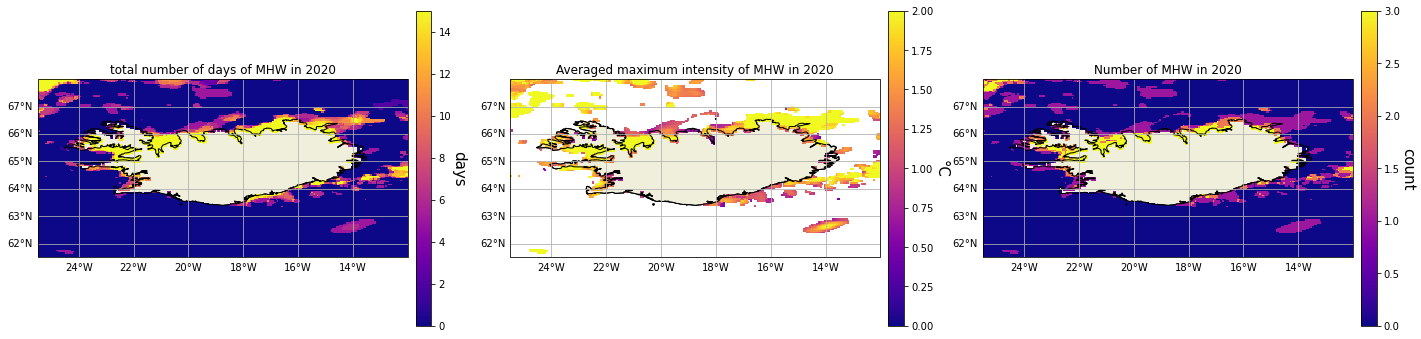

In [23]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(24,8),subplot_kw=dict(projection=ccrs.PlateCarree())) # 16 is width, 8 is height

### Plot the first variable
ax1.coastlines()
gl1 = ax1.gridlines(draw_labels=True)
gl1.right_labels = False
gl1.top_labels = False
ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.LAKES,facecolor='white',edgecolor='k')
ax1.set_extent([-12, -25.5, 61.5, 68],crs=ccrs.PlateCarree()) 

# Plot the total number of days, set the min/max values of the colorbar and the colormap to use
im1 = ax1.pcolor(sst['longitude'].data, sst['latitude'].data,mhwBlock_2D_totaldays,vmin=0,vmax=15,cmap='plasma')
    
# Add the titles and legend
ax1.set_title ('total number of days of MHW in 2020')              # add a title to the figure
cbar = f.colorbar(im1,ax=ax1,fraction=0.04, pad=0.02)                                            # add the colorbar
cbar.set_label('days', rotation=270,fontsize=15, labelpad=15)                                    # add the title of the colorbar

### Plot the second variable
ax2.coastlines()
gl2 = ax2.gridlines(draw_labels=True)
gl2.right_labels = False
gl2.top_labels = False
ax2.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax2.add_feature(cfeature.BORDERS)
ax2.add_feature(cfeature.LAKES,facecolor='white',edgecolor='k')
ax2.set_extent([-12, -25.5, 61.5, 68],crs=ccrs.PlateCarree()) 

# Plot the averaged maximum intensity, set the min/max values of the colorbar and the colormap to use
im2 = ax2.pcolor(sst['longitude'].data, sst['latitude'].data,mhwBlock_2D_imax,vmin=0,vmax=2,cmap='plasma')
    
# Add the titles and legend
ax2.set_title ('Averaged maximum intensity of MHW in 2020')              # add a title to the figure
cbar = f.colorbar(im2,ax=ax2, fraction=0.04, pad=0.02)                                            # add the colorbar
cbar.set_label('°C', rotation=270,fontsize=15, labelpad=15)                                    # add the title of the colorbar

### Plot the third variable
ax3.coastlines()
gl3 = ax3.gridlines(draw_labels=True)
gl3.right_labels = False
gl3.top_labels = False
ax3.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax3.add_feature(cfeature.BORDERS)
ax3.add_feature(cfeature.LAKES,facecolor='white',edgecolor='k')
ax3.set_extent([-12, -25.5, 61.5, 68],crs=ccrs.PlateCarree()) 

# Plot the number of MHW, set the min/max values of the colorbar and the colormap to use
im3 = ax3.pcolor(sst['longitude'].data, sst['latitude'].data,mhwBlock_2D_count,vmin=0,vmax=3,cmap='plasma')
    
# Add the titles and legend
ax3.set_title ('Number of MHW in 2020')              # add a title to the figure
cbar = f.colorbar(im3,ax=ax3, fraction=0.04, pad=0.02)                                            # add the colorbar
cbar.set_label('count', rotation=270,fontsize=15, labelpad=15)  


# 5. Conclusion 
[Go back to the "Table of contents"](#Table-of-contents)

This study constitutes an overview of the MHW characterics around Iceland thanks to the code that implements the MHW definition of Hobday et al. We have concatenated NetCDF files to create 20 year long time series and then analysed in several ways the MHW phenomenon.

# 6. Exercises
[Go back to the "Table of contents"](#Table-of-contents)

Here is a set of exercises we propose for you to go further into the analysis. There are 3 levels depending on how much Python code you need to write to answer the questions. If you need help, do not hesitate to contact the service desk : **servicedesk.cmems@mercator-ocean.eu** !

**Beginners** :
- In [Section 3.1.](#3.1.-Open-one-SST-observation-products) we have plotted a map of the SST at a specific date and time. Try to reproduce the plot using other dates! 
- In [Section 3.2.](#3.2.-Open-multiple-SST-observation-products-and-concatenate-them-altogether) we have concatenated different sst time series. Try to download additional products and create a longer SST time series!

**Intermediate** :
- In [Section 4.3.](#4.3.-MHW-characterics-over-two-sub-basins), try to analyse the MHW characteristics over your own subregion of interest. You can also plot other MHW characteristics than the one proposed in the section! 
- In [Section 4.4.](#4.4.-Averaging-marine-heat-waves-characteristics-over-a-year), try to collect the averaged marine heatwaves characteristics over your region of interest and plot a time series of the various parameter (e.g: evolution of mhw number over time, maximumintensity etc) 

**Experts** :
- In [Section 4.4.](#4.4.-2D-maps-of-marine-heat-waves-statistics-over-a-year), you can try to use the proposed code and paraellize it on your infrastruture. This way, you will be able to create 2D maps of averaged marine heatwaves characterics very quickly! You can also change the default block length of 1 year in the marineHeatWaves.py source code.

<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>
  
--- 

##### And thank you for your attention! :) 
    
    
We hope you enjoyed this second Jupyter Notebook training.

You now have plenty of tools to study MHW. Feel free to re-use and adapt all the Python scripts of this notebook to your needs ! 

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). If you have any question, do not hesitate to contact us at [servicedesk.cmems@mercator-ocean.eu](servicedesk.cmems@mercator-ocean.eu) !


